# Cifar-10 Classification
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [CIFAR10_classification.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Experiments/CIFAR10_classification.ipynb)
---
Image classification using *Convolutional Neural Network* and *Cifar-10 dataset*.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import tensorflow as tf

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

## Read and transform the dataset
---

In [3]:
cifar10 = tf.keras.datasets.cifar10
[X_train, Y_train],[X_test, Y_test] = cifar10.load_data()

# Data preparation
X_train, Y_train = X_train/255, Y_train
X_test, Y_test = X_test/255, Y_test
# Data augmentation [flip x]
X_train = np.vstack([X_train, X_train[:,:,::-1,:]])
Y_train = np.vstack([Y_train, Y_train])
X_test = np.vstack([X_test, X_test[:,:,::-1,:]])
Y_test = np.vstack([Y_test, Y_test])
# one hot for multi-class classification
# MNIST = 10 classes [0-9]
Y_train_oh = np.zeros((Y_train.size, 10))
Y_train_oh[np.arange(Y_train.size), Y_train.T] = 1
Y_test_oh = np.zeros((Y_test.size, 10))
Y_test_oh[np.arange(Y_test.size), Y_test.T] = 1

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (100000, 32, 32, 3)
Y_train: (100000, 1)
Y_train_oh: (100000, 10)
X_test: (20000, 32, 32, 3)
Y_test: (20000, 1)
Y_test_oh: (20000, 10)


In [4]:
# Label categories
objects = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
# Get dimensions
N1, N2, C = X_train[0].shape

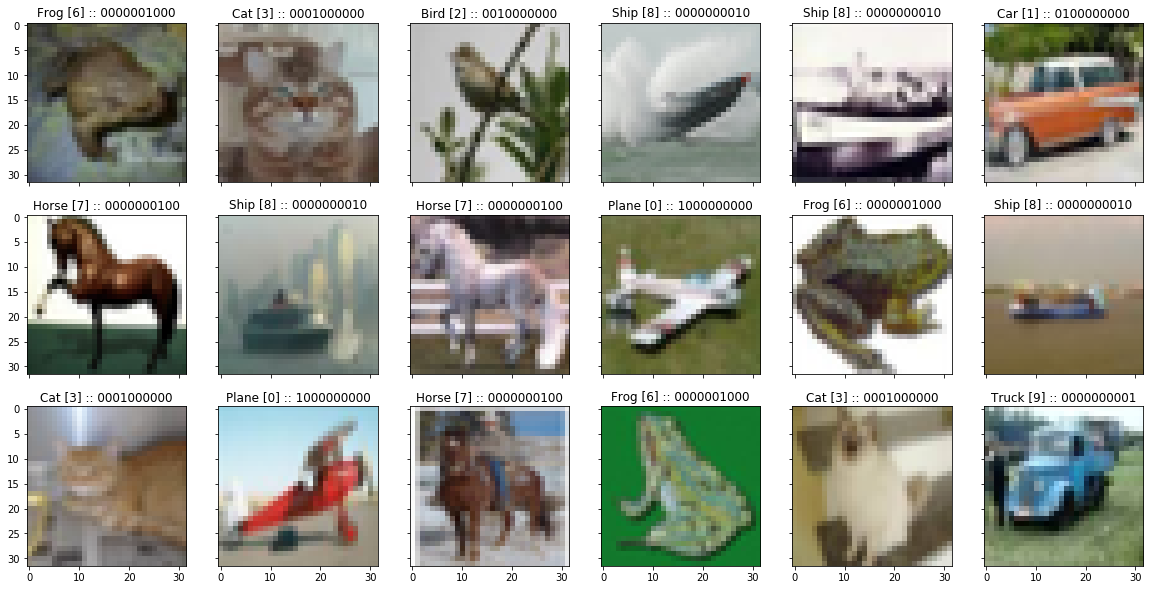

In [5]:
fig, AX = plt.subplots(3, 6, sharex=True, sharey=True)

np.random.seed(1234)
for ax in AX.ravel():
    rindex = np.random.randint(Y_train.size)
    ax.imshow(X_train[rindex])
    # title label + one-hot
    title = f'{objects[Y_train[rindex][0]]} {Y_train[rindex]} :: '
    title += ''.join([str(int(e)) for e in Y_train_oh[rindex]]) 
    ax.set_title(title)
plt.grid(False)

## Classification using *Convolutional Neural Network*
---

In [6]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(N1*N2*C, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(X_train, Y_train_oh, epochs=10)

Train on 100000 samples
Epoch 1/10
100000/100000 [==============================] - 35s 347us/sample - loss: 1.2441 - accuracy: 0.5492
Epoch 2/10
100000/100000 [==============================] - 32s 324us/sample - loss: 0.8670 - accuracy: 0.6960
Epoch 3/10
100000/100000 [==============================] - 33s 326us/sample - loss: 0.7521 - accuracy: 0.7384
Epoch 4/10
100000/100000 [==============================] - 34s 337us/sample - loss: 0.6878 - accuracy: 0.7599
Epoch 5/10
100000/100000 [==============================] - 34s 335us/sample - loss: 0.6433 - accuracy: 0.7763
Epoch 6/10
100000/100000 [==============================] - 33s 332us/sample - loss: 0.6070 - accuracy: 0.7908
Epoch 7/10
100000/100000 [==============================] - 33s 332us/sample - loss: 0.5746 - accuracy: 0.8026
Epoch 8/10
100000/100000 [==============================] - 33s 329us/sample - loss: 0.5522 - accuracy: 0.8093
Epoch 9/10
100000/100000 [==============================] - 34s 342us/sample - loss: 0.5

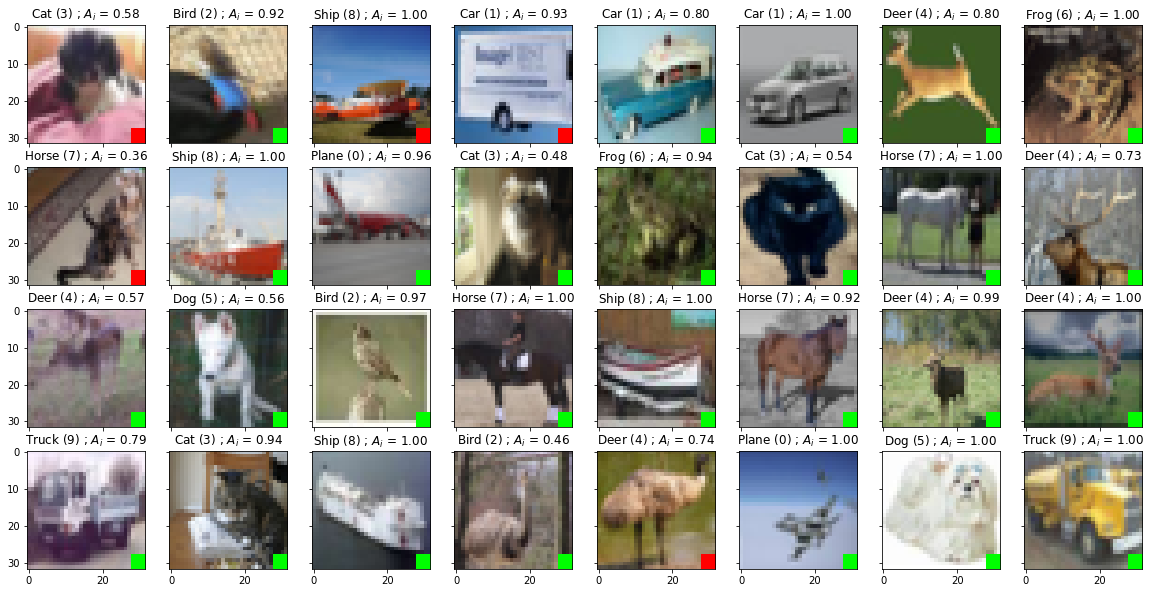

In [8]:
fig, AX = plt.subplots(4, 8, sharex=True, sharey=True)
AX = [b for a in AX for b in a]

pred = model.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Prediction
    A_ = pred[index]
    Y_ = np.argmax(A_)
    # Select sample image
    imshow = X_test[index]
    # Green square: predited correctly
    # Red square: predicted wrongly
    if Y_ == Y_test[index]:
        imshow[-4:, -4:] = (0, 1, 0)
    else:
        imshow[-4:, -4:] = (1, 0, 0)
    ax.imshow(imshow)
    ax.set_title(f'{objects[Y_]} ({Y_})' + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=12)

In [9]:
print('Validation')
pred1 = model.predict(X_test)
print('Test:', np.sum((Y_test_oh - pred1)**2, axis=1).mean())
pred2 = model.predict(X_train)
print('Train:', np.sum((Y_train_oh - pred2)**2, axis=1).mean())

Validation
Test: 0.2775033290645693
Train: 0.14203523197436863
